In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2k-chatgpt4-questions/Bonus Questions.csv
/kaggle/input/2k-chatgpt4-questions/20 Job Categories.csv
/kaggle/input/2k-chatgpt4-questions/IELTS Questions.csv
/kaggle/input/2k-chatgpt4-questions/Email Marketing.csv
/kaggle/input/2k-chatgpt4-questions/Acting As.csv
/kaggle/input/2k-chatgpt4-questions/Copywriting Questions.csv
/kaggle/input/2k-chatgpt4-questions/Shadow Work For Star Signs.csv
/kaggle/input/2k-chatgpt4-questions/Business Questions.csv
/kaggle/input/2k-chatgpt4-questions/Google Ads.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/2k-chatgpt4-questions/20 Job Categories.csv', encoding='ISO-8859-1')
df.head()

,SEOs
0,Compile a list of ten long-tail keywords relat...
1,Create a blog post with the title Õ10 Tips for...
2,Make a list of the top five common SEO mistake...
3,Create a case study detailing how Chat GPT ass...
4,Make a list of five Chat GPT tools that SEOs s...


In [5]:
df.columns

Index(['SEOs'], dtype='object')

In [6]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SEOs    441 non-null    object
dtypes: object(1)
memory usage: 3.6+ KB


In [7]:
# Check for missing values
df.isnull().sum()

SEOs    0
dtype: int64

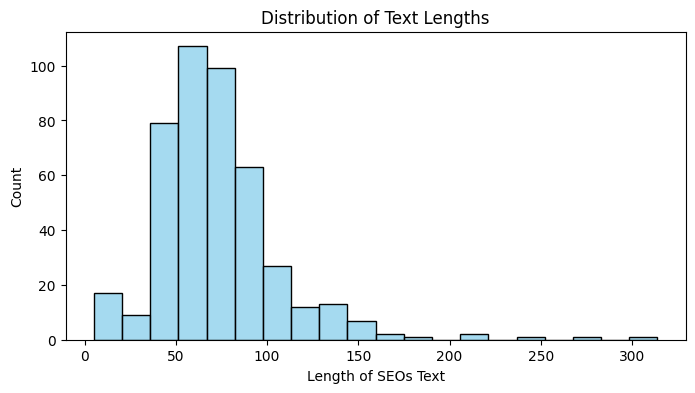

In [8]:
# Add a new column for text length
df['length'] = df['SEOs'].astype(str).apply(len)

# Plot text length
plt.figure(figsize=(8,4))
sns.histplot(df['length'], bins=20, color='skyblue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of SEOs Text')
plt.ylabel('Count')
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

# Vectorize the text
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['SEOs'].astype(str))

# Reduce dimensions
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

# Cluster into 5 groups (you can change n_clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Add labels to the DataFrame
df['Cluster'] = labels
df.head()

,SEOs,length,Cluster
0,Compile a list of ten long-tail keywords relat...,60,4
1,Create a blog post with the title Õ10 Tips for...,78,1
2,Make a list of the top five common SEO mistake...,70,0
3,Create a case study detailing how Chat GPT ass...,103,1
4,Make a list of five Chat GPT tools that SEOs s...,56,1


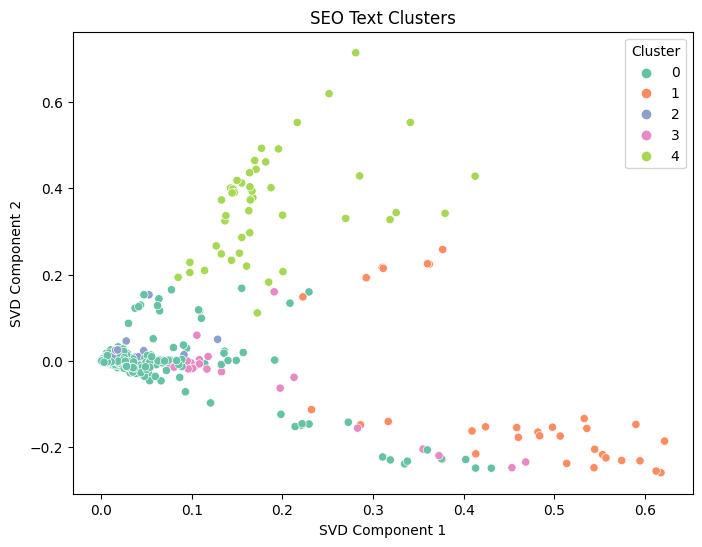

In [10]:
# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=labels, palette='Set2')
plt.title('SEO Text Clusters')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.legend(title='Cluster')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [12]:
# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9775280898876404
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.85      0.92        13

    accuracy                           0.98        89
   macro avg       0.93      0.97      0.94        89
weighted avg       0.98      0.98      0.98        89

